# Solutions to chapter 8 applied exercises

In [43]:
import pandas as pd
import numpy as np
from IPython.display import display
from ISLP import load_data
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from ISLP.bart import BART

## Question7

In [3]:
boston = load_data('Boston')
display(boston.head())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
X_train, X_test, y_train, y_test = train_test_split(boston.drop(columns=['crim']), boston['crim'], test_size=0.5, random_state=1)

In [5]:
results = pd.DataFrame()
results["n_estimators"] =  np.concatenate(
    [
        range(1, 501, 10),
        range(1, 501, 10),
        range(1, 501, 10)
    ]
)
results["error"] = np.inf
results["max_features"] = np.concatenate(
    [
        np.repeat(12, 50),
        np.repeat(6, 50),
        np.repeat(3, 50),
    ]
)
display(results.sample(10))

,n_estimators,error,max_features
105,51,inf,3
147,471,inf,3
55,51,inf,6
129,291,inf,3
75,251,inf,6
61,111,inf,6
138,381,inf,3
42,421,inf,12
137,371,inf,3
29,291,inf,12


In [6]:
for index, row in results.iterrows():
    model = RandomForestRegressor(n_estimators=int(row['n_estimators']), max_features=int(row['max_features']))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.loc[index, 'mse'] = mean_squared_error(y_test, y_pred)

In [9]:
display(results)

,n_estimators,error,max_features,mse
0,1,inf,12,92.717427
1,11,inf,12,33.827343
2,21,inf,12,33.232889
3,31,inf,12,31.288500
4,41,inf,12,35.295966
...,...,...,...,...
145,451,inf,3,31.295612
146,461,inf,3,30.836945
147,471,inf,3,30.216797
148,481,inf,3,31.147613


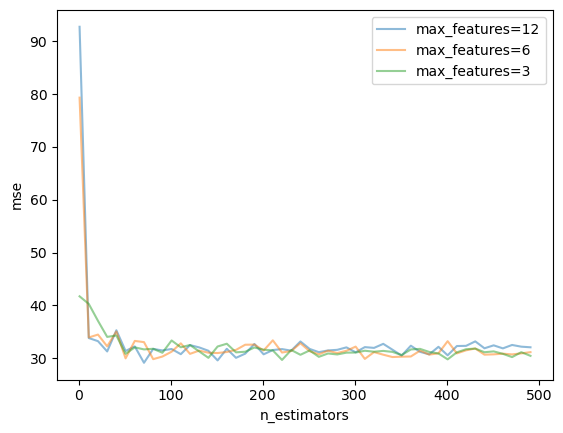

In [10]:
for max_features in results['max_features'].unique():
    subset = results[results['max_features'] == max_features]
    plt.plot(subset['n_estimators'], subset['mse'], label=f'max_features={max_features}', alpha=0.5, )
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('mse')
plt.show()


## Question 8

(a) Split the data set into a training set and a test set.

In [17]:
carseats = load_data('Carseats')
display(carseats.head())
display(carseats.info())

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


None

In [25]:
X_train, X_test, y_train, y_test = train_test_split(carseats.drop(columns=['Sales']), carseats['Sales'], test_size=0.3)
label_encoder = LabelEncoder()
X_train['ShelveLoc'] = label_encoder.fit_transform(X_train['ShelveLoc'])
X_train['Urban'] = label_encoder.fit_transform(X_train['Urban'])
X_train['US'] = label_encoder.fit_transform(X_train['US'])
X_test['ShelveLoc'] = label_encoder.fit_transform(X_test['ShelveLoc'])
X_test['Urban'] = label_encoder.fit_transform(X_test['Urban'])
X_test['US'] = label_encoder.fit_transform(X_test['US'])


(b) Fit a regression tree to the training set. Plot the tree, and inter- pret the results. What test MSE do you obtain?

MSE: 5.227184166666666


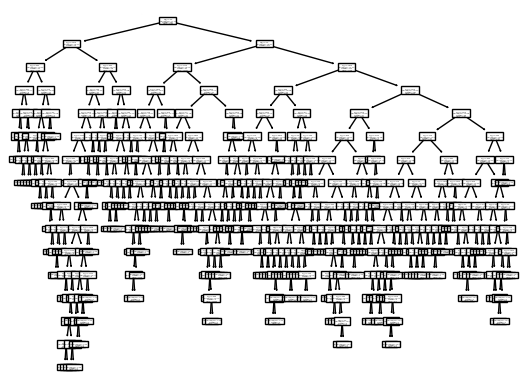

In [26]:
model = DecisionTreeRegressor(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
plot_tree(model)
plt.show()


(c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

In [31]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("tree", DecisionTreeRegressor(random_state=1))
])

param_grid = {
    "tree__max_depth": range(1, 21),
    "tree__min_samples_split": range(1, 21)
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

Best parameters: {'tree__max_depth': 8, 'tree__min_samples_split': 7}
Best CV score: -3.3734877114931634


/Users/filipsjostrand/anaconda3/envs/ISLP/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
100 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/filipsjostrand/anaconda3/envs/ISLP/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/filipsjostrand/anaconda3/envs/ISLP/lib/python3.9/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/filipsjostrand/anaconda3/envs/ISLP/lib/python3.9/site-packages/sklear

MSE: 5.036884485142915


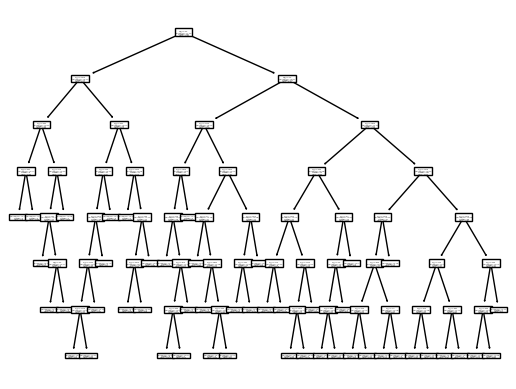

In [32]:
best_model = DecisionTreeRegressor(max_depth=7, min_samples_split=8, random_state=1)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
plot_tree(best_model)
plt.show()

(d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine which variables are most important.

In [35]:
tot_features = X_train.shape[1]
bagging = RandomForestRegressor(max_features=tot_features)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f"Feature importances: {bagging.feature_importances_}")

MSE: 2.6076681052499993
Feature importances: [0.10681345 0.05363027 0.08919716 0.04200278 0.2950825  0.28446269
 0.08412786 0.03492256 0.00538583 0.0043749 ]


(e) Use random forests to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

In [41]:
model = RandomForestRegressor(max_features=int(np.sqrt(tot_features)), random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f"Feature importances: {model.feature_importances_}")

MSE: 3.350280932416667
Feature importances: [0.09024497 0.08649717 0.10409313 0.07404116 0.25020415 0.20029834
 0.11602457 0.05650072 0.01110976 0.01098603]


(f) Now analyze the data using BART, and report your results.

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['ShelveLoc', 'Urban', 'US']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Now, you can fit the BART model on the transformed data
model = BART(random_state=0, burnin=5, ndraw=15)
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

MSE: 1.7032336097324385
